# Generating random numbers with NumPy

NumPy greatly streamlines the process of generating many random numbers!

## Import NumPy

In [1]:
import numpy as np

## Random number generators

NumPy has its own family of random number generators. It requires that we initialize or specify the GENERATOR object.

In [2]:
rg = np.random.default_rng(12345)

In [3]:
%whos

Variable   Type         Data/Info
---------------------------------
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
rg         Generator    Generator(PCG64)


Generating random numbers requires calling methods associated with the generator object.

The uniform random number between 0 and 1 is created using the `rg.random()` method.

In [4]:
rg.random()

0.22733602246716966

In [5]:
rg.random()

0.31675833970975287

In [6]:
rg.random()

0.7973654573327341

Reseting the seed will allow us to reproduce the previous SEQUENCE of random numbers.

In [7]:
rg = np.random.default_rng(12345)

print( rg.random(), rg.random(), rg.random() )

0.22733602246716966 0.31675833970975287 0.7973654573327341


But, NumPy allows us to generate MANY random numbers in one function call!!!!

The `random` module required us to ITERATE via for-loops or list comprehensions to generate SEQUENCES of random numbers.

NumPy handles all of that for us!!!

In [8]:
rg = np.random.default_rng(12345)

In [9]:
rg.random( 3 )

array([0.22733602, 0.31675834, 0.79736546])

This allows us to generate a LARGE number of values and summarize them easily!!

In [10]:
rg.random( 1001 ).mean()

0.49129676414051904

But...we can tell `rg.random()` to generate a 2D array!!!!!

In [11]:
rg = np.random.default_rng(12345)

In [12]:
rg.random( (4, 2) )

array([[0.22733602, 0.31675834],
       [0.79736546, 0.67625467],
       [0.39110955, 0.33281393],
       [0.59830875, 0.18673419]])

In [13]:
rg.random( (1001, 5) ).shape

(1001, 5)

In [14]:
rg.random( (5, 1001) ).shape

(5, 1001)

In [15]:
rg.random( (10000, 500) ).shape

(10000, 500)

In [16]:
rg.random( (10000, 500) ).size

5000000

## Other distributions

In [17]:
help( np.random.random )

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [18]:
help( np.random.normal )

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the `~numpy.random.Generator.normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
     

To generate 7 random numbers from a Gaussian or Bell Curve with mean -100 and standard deviation 5:

In [19]:
rg = np.random.default_rng(12345)

In [20]:
rg.normal( -100, 5, 7 )

array([-107.11912518,  -93.68135771, -104.35330869, -101.29586617,
       -100.37671654, -103.70442326, -106.83896351])

In [21]:
rg.normal( -100, 5, (4, 2) )

array([[ -96.75553599,  -98.19470943],
       [-109.76431532,  -88.26295173],
       [ -95.15751547, -103.7969359 ],
       [ -95.48900863, -102.33476587]])

# Simulate the standard error on the mean (SEM)

NumPy greatly streamlines and simplifies the simulation!!!!

## Import NumPy

In [1]:
import numpy as np

## Define the random number generator

In [2]:
rg = np.random.default_rng(2100)

In [3]:
%whos

Variable   Type         Data/Info
---------------------------------
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
rg         Generator    Generator(PCG64)


## Simulation

We can generate as many random numbers as we want and organize the results in a 2D array!

Let's simulate 7 random numbers from a Uniform distribution between 0 and 1 and REPLICATE that process 5000 times.

In [4]:
Ns = 7

In [5]:
nr = 5000

Store the random numbers in an array named `X`.

In [6]:
X = rg.random( (Ns, nr) )

In [7]:
X.shape

(7, 5000)

In [8]:
X.ndim

2

In [9]:
X.size

35000

In [10]:
X[:, :3]

array([[0.29903711, 0.94885201, 0.26654812],
       [0.51239859, 0.08790237, 0.5364079 ],
       [0.7045732 , 0.37019079, 0.87104672],
       [0.23874204, 0.21034762, 0.15061256],
       [0.74578658, 0.62917171, 0.70982467],
       [0.93129205, 0.79358631, 0.24083404],
       [0.47486183, 0.758452  , 0.45717285]])

### Calculate the average from the 7 random numbers

Each column is an individual replication of 7 numbers.

Calculate their average!

In [11]:
X.mean()

0.49802758383095946

In [12]:
X.mean( axis = 0 ).shape

(5000,)

In [13]:
x_means = X.mean( axis = 0 )

In [14]:
x_means.shape

(5000,)

In [15]:
x_means[:4]

array([0.55809877, 0.54264326, 0.46177812, 0.41201259])

In [16]:
x_means[-1]

0.377372022802107

### Calculate the standard error on the mean

The SEM is the STANDARD DEVIATION of the averages!!!!!!

The `.std()` must be applied to the result stored in `x_means`.

BUT REMEMBER we want the UNBIASED ESTIMATOR!!!

In [17]:
x_means.std( ddof = 1 )

0.1082456884853543

### Everything in one line of code

In [18]:
rg = np.random.default_rng(2100)

rg.random( (Ns, nr) ).mean( axis = 0).std( ddof = 1 )

0.1082456884853543

## Study the effect of the sample size on the standard error

In [19]:
sample_sizes = 5 * ( 2 ** np.arange(12) )

In [20]:
sample_sizes

array([    5,    10,    20,    40,    80,   160,   320,   640,  1280,
        2560,  5120, 10240])

In [21]:
sample_sizes.shape

(12,)

In [22]:
list( sample_sizes )

[5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]

Let's iterate and apply the simulation for the standard error on the mean to the different sample sizes!!!!

In [23]:
rg = np.random.default_rng(2100)

In [24]:
sem_vs_sample_size = [ rg.random( (nns, nr) ).mean(axis=0).std(ddof=1) for nns in list(sample_sizes)  ]

In [25]:
sem_vs_sample_size

[0.12639977760402196,
 0.09248917058659661,
 0.065073251479999,
 0.0452940285911916,
 0.03206562241809871,
 0.02278191667912868,
 0.016291029330758027,
 0.011515996158164071,
 0.007974553089462759,
 0.005750358904674762,
 0.004012823505979166,
 0.0028040113797993286]

Let's plot the standard error on the mean vs the sample size.

In [26]:
import matplotlib.pyplot as plt

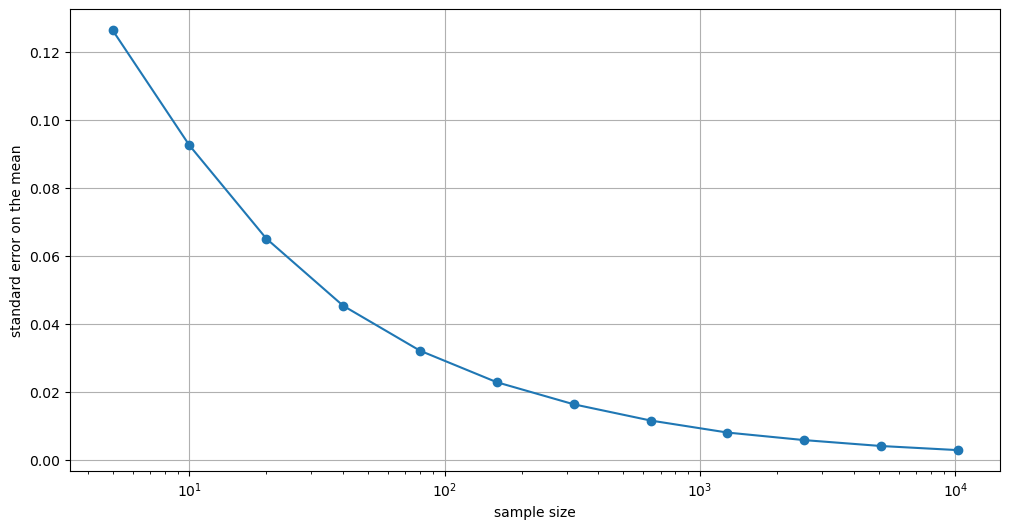

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot( sample_sizes, sem_vs_sample_size, '-o' )
ax.set_xscale('log')
ax.set_xlabel('sample size')
ax.set_ylabel('standard error on the mean')
ax.grid(True)
plt.show()

# RESHAPING with NumPy

We need to review DIMENSIONS or SHAPES in NumPy. What is the difference between ROWS and COLUMNS?

## Import Modules

In [1]:
import numpy as np

## Introduction to reshaping

Let's begin be reviewing a 1D NumPy array.

In [2]:
np.arange( 1, 25 )

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [3]:
np.arange( 1, 25 ).ndim

1

In [4]:
np.arange( 1, 25 ).shape

(24,)

In [5]:
np.arange( 1, 25 ).size

24

In [6]:
x = np.arange( 1, 25 )

In [7]:
%whos

Variable   Type       Data/Info
-------------------------------
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
x          ndarray    24: 24 elems, type `int32`, 96 bytes


In [8]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [9]:
x.size

24

In [10]:
x.ndim

1

In [11]:
x.shape

(24,)

Let's convert or **RESHAPE** the 1D array into a 2D array!!!!

We will literally ADD a dimension to the object and thus modify where and how the values are stored!

We reshape with the `.reshape()` method. All NumPy arrays have the `.reshape()` method.

`.reshape( <NEW ROWS>, <NEW COLUMNS> )`

Let's convert the `x` into a 2D array with 12 rows and 2 columns.

In [12]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [14]:
x.reshape( 12, 2 )

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [15]:
[ [1, 2],
  [3, 4], 
  [5, 6] ]

[[1, 2], [3, 4], [5, 6]]

In [16]:
x.reshape( 12, 2 ).ndim

2

The `.ndim` attribute is DIFFERENT AFTER applying the reshaping operation! Originally, the `x` object has 1 dimension:

In [17]:
x.ndim

1

In [18]:
x.shape

(24,)

In [19]:
x.reshape( 12, 2 ).shape

(12, 2)

HOWEVER...VERY IMPORTANTLY...the TOTAL number of ELEMENTS has NOT changed!!!

In [20]:
x.size

24

In [21]:
x.reshape( 12, 2 ).size

24

In [22]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [23]:
x.reshape( 12, 2 )

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [24]:
x2 = x.reshape( 12, 2 )

In [25]:
x2

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [26]:
x2[ :3, : ]

array([[1, 2],
       [3, 4],
       [5, 6]])

In [27]:
x[ :3 ]

array([1, 2, 3])

Of course, we could have reshaped to something other than 12 rows!

We could have reshaped to 6 rows and 4 columns!

In [30]:
x.reshape( 6, 4 )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24]])

Or, I could do 4 rows and 6 columns!

In [31]:
x.reshape( 4, 6 )

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

Or, 2 rows and 12 columns!

In [32]:
x.reshape( 2, 12 )

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [33]:
x.reshape( 2, 12 ).ndim

2

In [34]:
x.reshape( 2, 12 ).shape

(2, 12)

In [35]:
x.reshape( 2, 12 ).size

24

I could even try 8 rows and 3 columns!

In [36]:
x.reshape( 8, 3 )

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24]])

Or 3 rows and 8 columns!

In [37]:
x.reshape( 3, 8 )

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24]])

The important point is that the NUMBER OF ROWS multiplied by the NUMBER OF COLUMNS must equal the total number of elements or SIZE!

If, you don't want to do the mental math and type both the NEW number of ROWS and the NEW number of COLUMNS...you can include a -1 as an argument.

In [39]:
x.reshape( 12, -1 )

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [40]:
x.reshape( 3, -1 )

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24]])

In [42]:
x.reshape( 3, -1 ).shape

(3, 8)

In [43]:
x.reshape( -1, 2 )

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [44]:
x.reshape( -1, 8 )

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24]])

PLEASE BE CAREFUL!!!!!!

In [45]:
x.reshape( 9, -1 )

ValueError: cannot reshape array of size 24 into shape (9,newaxis)

In [46]:
x.reshape( 9, 3 )

ValueError: cannot reshape array of size 24 into shape (9,3)

In [47]:
x.reshape( 9, 2 )

ValueError: cannot reshape array of size 24 into shape (9,2)

In [48]:
x.reshape( 8, 4 )

ValueError: cannot reshape array of size 24 into shape (8,4)

The SIZE must equal the PRODUCT of the number of rows and the number of columns!

## Other reshaping procedures

The most common reshaping technique is the TRANSPOSE of a 2D array.

Transposing SWAPS the rows and the columns.

To see how to transpose let's work with a 2D array named `y`.

In [49]:
y = np.arange( 1, 25 ).reshape( 8, -1 )

In [50]:
y

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24]])

In [51]:
y.ndim

2

In [52]:
%whos

Variable   Type       Data/Info
-------------------------------
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
x          ndarray    24: 24 elems, type `int32`, 96 bytes
x2         ndarray    12x2: 24 elems, type `int32`, 96 bytes
y          ndarray    8x3: 24 elems, type `int32`, 96 bytes


In [53]:
y.shape

(8, 3)

NumPy 2D arrays include the `.T` attribute to EXECUTE a transpose.

In [54]:
y.T

array([[ 1,  4,  7, 10, 13, 16, 19, 22],
       [ 2,  5,  8, 11, 14, 17, 20, 23],
       [ 3,  6,  9, 12, 15, 18, 21, 24]])

In [55]:
y

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24]])

In [56]:
y.shape

(8, 3)

In [57]:
y.T.shape

(3, 8)

Transposing is unfortunately what a lot of people will think of when you say RESHAPING the array!

But the `.reshape()` method is FAR MORE GENERAL than just TRANSPOSING!!

In [58]:
y

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24]])

In [59]:
y.T

array([[ 1,  4,  7, 10, 13, 16, 19, 22],
       [ 2,  5,  8, 11, 14, 17, 20, 23],
       [ 3,  6,  9, 12, 15, 18, 21, 24]])

In [60]:
y.reshape( 12, 2 )

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [61]:
y.reshape( 4, 6 )

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In fact the `.reshape()` is so general we can even turn a 2D array into a SINGLE ROW or SINGLE COLUMN object!!

In [62]:
y

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24]])

In [63]:
y.reshape( 1, -1 )

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]])

In [64]:
y.reshape( -1, 1 )

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24]])

In [65]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [66]:
y.reshape( 1, -1 )

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]])

In [67]:
x.ndim

1

In [68]:
x.shape

(24,)

In [70]:
y.reshape( 1, -1 ).ndim

2

In [71]:
y.reshape( 1, -1 ).shape

(1, 24)

But later in the semester and especially in the classes that follow CMPINF 2100...the difference between a TRUE 1D array and a 2D array that is a single column/row will be important...

Sometimes we need to DROP a 2D array DOWN to a 1D array.

We can do that with the `.ravel()` method.

In [72]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [73]:
x.ndim

1

In [75]:
y.reshape( 1, -1 ).shape

(1, 24)

In [76]:
y.reshape( 1, -1 ).ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [77]:
y.reshape( 1, -1 ).ravel().shape

(24,)

In [78]:
y.reshape( 1, -1 ).ravel().ndim

1

In [80]:
y.reshape( -1, 1 ).ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [81]:
y.reshape( -1, 1 ).ravel().ndim

1

In [82]:
y.reshape( -1, 1 ).ravel().shape

(24,)

## Summary

We need to pay close attention to the number of ROWS and COLUMNS or the DIMENSIONS and SHAPE of the NumPy array!!!

We can modify the SHAPE by `.reshape()` and we can "SQUEEZE" or "compress" a 2D array into a 1D array with `.ravel()`.